# SI618 Lab 9

In this lab, we will be working with three different datasets

1. The UCI data set about wine quality from lab 8. The dataset comes from https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
2. Selected gender inequality related data from global development database downloaded from the World Bank data bank (https://databank.worldbank.org/reports.aspx?source=world-development-indicators#). Read the metadata file for more information about the two variables being used.
3. A monthly time series dataset of the number of domestic airline passengers (in 000s) in the United States collected from https://www.transtats.bts.gov/TRAFFIC/

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from plotnine import *

## Part 1: Wine Quality

### Question 1: (15 points) Load the wine quality dataset. Define a new column **isgood** based on the **quality** column with wines with a quality rating higher than 5 being *good* and the rest being *bad*. 
  * Use a JointGrid approach look at the relationship between sulphates and alcohol.
  * Look at the same relationship separately for *good* and *bad* wines with separate JointGrids
  * What do you observe? 

Hint: When appropriate, create additional figures that allow you to exclude the effect of outliers


In [2]:
wine_df = pd.read_csv("winequality-red.csv")
wine_df["isgood"] = wine_df["quality"] > 5

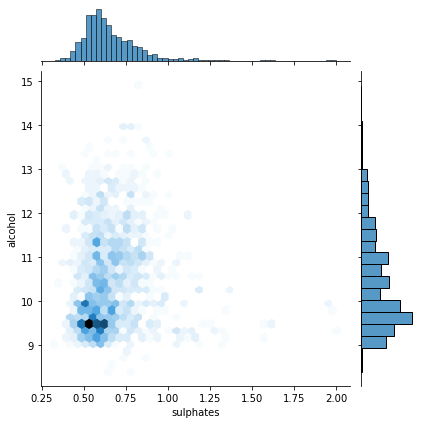

In [3]:
sns.jointplot(x='sulphates',y='alcohol',data=wine_df,kind="hex")

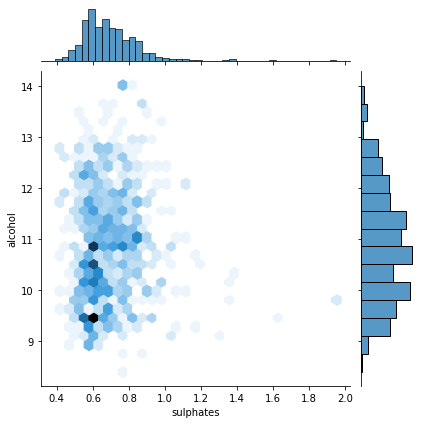

In [4]:
sns.jointplot(x='sulphates',y='alcohol',data=wine_df[wine_df["isgood"]],kind="hex")

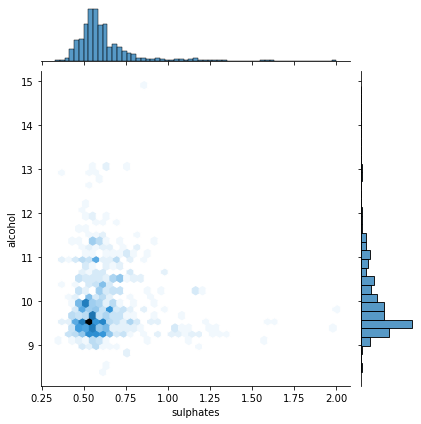

In [5]:
sns.jointplot(x='sulphates',y='alcohol',data=wine_df[~wine_df["isgood"]],kind="hex")

Fore good wines, the distribution of alcohol is more uniform for the same sulphate level. For bad wines, generally the more sulphates means the more alcohol.

### Question 2: (15 points) Use OLS to perform either a regression or an ANOVA for the relationship between sulphates with (i) categorical variable of wine quality and (ii) original quality. Interpret your results.

In [6]:
wine_model1 = smf.ols('sulphates ~ isgood', data=wine_df).fit()
wine_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sulphates   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     79.74
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           1.15e-18
Time:                        00:19:15   Log-Likelihood:                 608.57
No. Observations:                1599   AIC:                            -1213.
Df Residuals:                    1597   BIC:                            -1202.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6185      0.006    101.955      0.000       0.607       0.630
isgood[T.True]     0.0741      0.008      8.930      0.000       0.058       0.090
==============================================================================
Omnibus:                     1001.323   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14483.316
Skew:                           2.695   Prob(JB):                         0.00
Kurtosis:                      16.723   Cond. No.                         2.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
wine_model2 = smf.ols('sulphates ~ quality', data=wine_df).fit()
wine_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sulphates   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     107.7
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           1.80e-24
Time:                        00:19:15   Log-Likelihood:                 621.82
No. Observations:                1599   AIC:                            -1240.
Df Residuals:                    1597   BIC:                            -1229.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3607      0.029     12.464      0.000       0.304       0.418
quality        0.0528      0.005     10.380      0.000       0.043       0.063
==============================================================================
Omnibus:                     1042.311   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16731.569
Skew:                           2.811   Prob(JB):                         0.00
Kurtosis:                      17.816   Cond. No.                         41.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Part 2: Trends in Gender Inequality

### Question 3: (15 points) Visualize the relationship between the representation of women in the parliment (**SG.GEN.PARL.ZS**) and the legal and regulatory support for providing economic opportunities for women (**SG.LAW.INDX**) in the year 2020 using a scatter plot drawn with plotnine (*geom_point*). Then overlay a linear regression fit with the standard error confidence intervals on the same plot (*geom smooth*). Remember to label and resize the figure as necessary to make it readable. What do you observe?   

In [8]:
gender_df = pd.read_csv("gender_world_development.csv")
gender_df.head(3)

,Unnamed: 0,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,0,Afghanistan,AFG,Proportion of seats held by women in national ...,SG.GEN.PARL.ZS,NaN,NaN,NaN,NaN,NaN,...,27.710843,27.710843,27.710843,27.710843,27.710843,27.710843,27.710843,NaN,27.868852,27.016129
1,4,Afghanistan,AFG,Women Business and the Law Index Score (scale ...,SG.LAW.INDX,NaN,NaN,NaN,NaN,NaN,...,28.750000,28.750000,28.750000,28.750000,28.750000,38.125000,38.125000,38.125000,38.125000,38.125000
2,13,Albania,ALB,Proportion of seats held by women in national ...,SG.GEN.PARL.ZS,NaN,NaN,NaN,NaN,NaN,...,15.714286,15.714286,17.857143,20.000000,20.714286,22.857143,27.857143,27.857143,29.508197,29.508197


D:\Software\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 84 rows containing missing values.


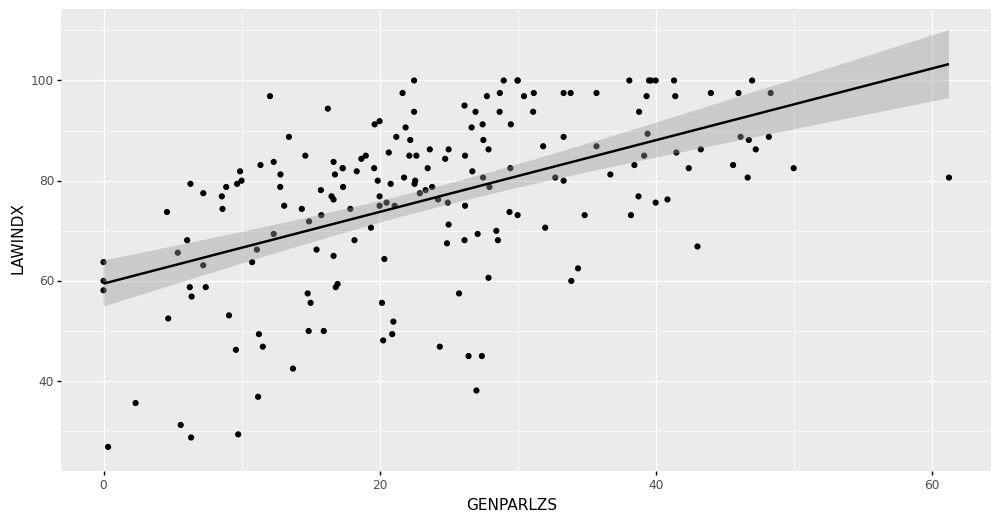

<ggplot: (126589124810)>

In [19]:
q2_3_df = gender_df[gender_df["Series Code"]=="SG.GEN.PARL.ZS"][["Country Code", "2020 [YR2020]"]].merge(
    right=gender_df[gender_df["Series Code"]=="SG.LAW.INDX"][["Country Code", "2020 [YR2020]"]],
    how='outer',
    on="Country Code",
    suffixes=[".GEN.PARL.ZS", ".LAW.INDX"]
)
q2_3_df.rename(columns={"2020 [YR2020].GEN.PARL.ZS": "GENPARLZS", "2020 [YR2020].LAW.INDX": "LAWINDX"}, inplace=True)
(ggplot(q2_3_df, aes('GENPARLZS', 'LAWINDX')) + geom_point() + geom_smooth(method='lm') + theme(figure_size=(12, 6)))
# q2_3_df

### Question 4: (10 points) Visualize the evolution of the proportion of women in the legislature in the United States over the years using a line plot

Hint: You can use the pandas *melt* function to convert columns to rows

/Users/enoch/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
/Users/enoch/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.


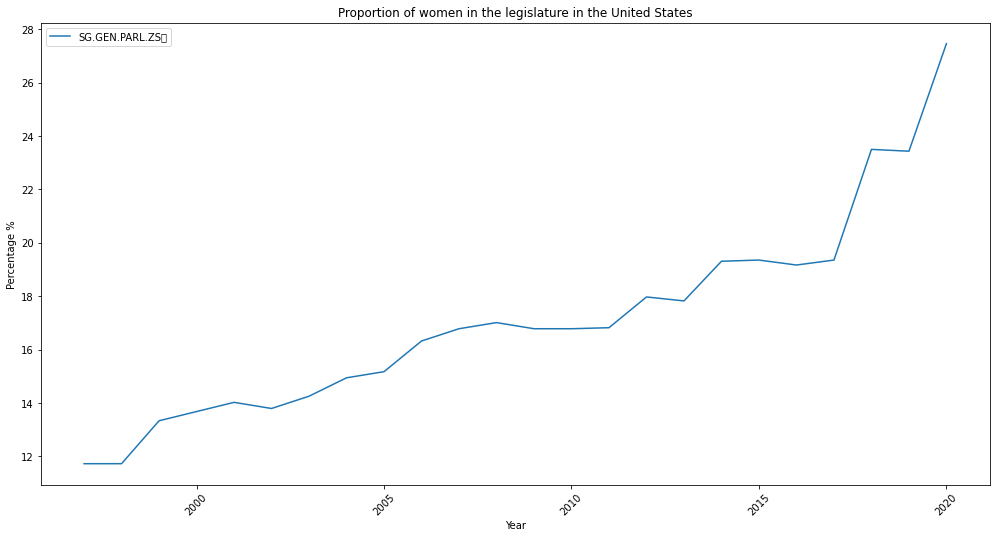

/Users/enoch/anaconda3/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 37 rows containing missing values.


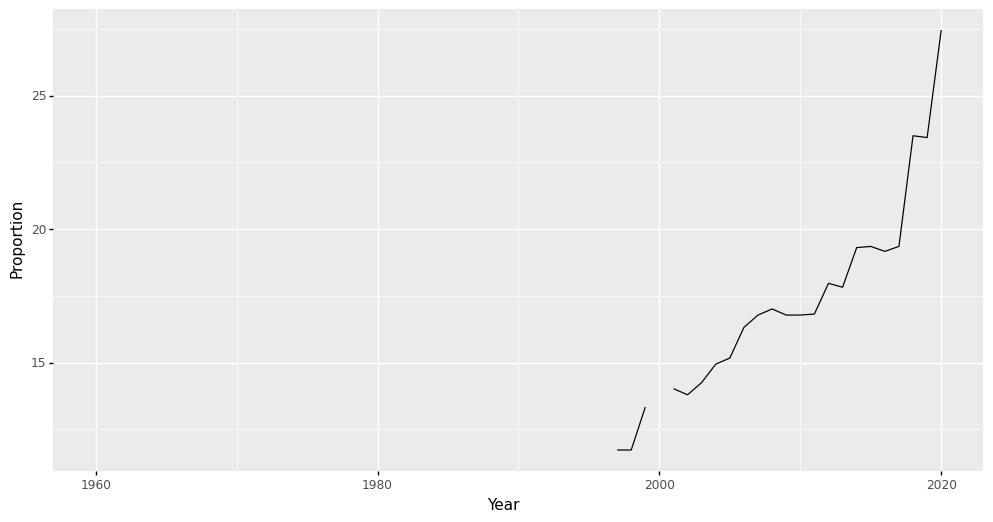

<ggplot: (8772888563469)>

In [44]:
plt.figure(figsize=(17, 8.5))
sns.lineplot(data = gender_df[(gender_df["Country Code"]=="USA") & (gender_df["Series Code"]=="SG.GEN.PARL.ZS")].iloc[:, 5::].rename(columns={f"{x} [YR{x}]": x for x in range(1960, 2021)}).T)
plt.xticks(rotation=45)
plt.legend(["SG.GEN.PARL.ZS	"])
plt.title("Proportion of women in the legislature in the United States")
plt.xlabel("Year")
plt.ylabel("Percentage %")
plt.show()
(ggplot(gender_df[(gender_df["Series Code"]=="SG.GEN.PARL.ZS")].iloc[:, 5::].rename(columns={f"{x} [YR{x}]": x for x in range(1960, 2021)}).T.reset_index(level=0).rename(columns={412: "SG.GEN.PARL.ZS", "index": "Year"}), aes("Year", "SG.GEN.PARL.ZS", group = 1)) + geom_line() + theme(figure_size=(12, 6)) + labs(x='Year', y='Proportion'))

In [21]:
gender_df[(gender_df["Series Code"]=="SG.GEN.PARL.ZS")].iloc[:, 5::].rename(columns={f"{x} [YR{x}]": x for x in range(1960, 2021)}).T.reset_index(level=0).rename(columns={412: "SG.GEN.PARL.ZS", "index": "Year"})


,index,0,2,4,6,8,10,12,14,16,...,512,514,516,518,520,522,524,526,528,530
0,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2016,27.710843,22.857143,31.601732,NaN,32.142857,36.818182,11.111111,35.797665,10.687023,...,28.562155,22.140948,17.456647,19.391947,19.391947,23.810069,23.819915,23.810069,23.746082,23.091367
57,2017,27.710843,27.857143,25.757576,NaN,32.142857,30.454545,11.111111,38.132296,18.095238,...,29.571567,22.293167,17.375746,19.399918,19.399918,24.016932,24.027281,24.016932,24.492869,23.590337
58,2018,NaN,27.857143,25.757576,NaN,32.142857,30.454545,11.111111,38.910506,18.095238,...,30.427773,22.045612,18.497803,17.104558,17.104558,24.074280,24.084821,24.074280,25.740659,24.097878
59,2019,27.868852,29.508197,25.757576,NaN,46.428571,30.000000,11.111111,40.157480,23.484848,...,31.972497,22.011331,19.065705,18.957346,18.957346,24.078116,24.089022,24.078116,26.318476,24.636604


### Question 5: (20 points) Create the visualization from Q4 for the 10 most populus countries in the world (China, India, US, Indonesia, Pakistan, Brazil, Nigeria, Bangladesh, Russia, Mexico) using a facet grid from plotnine. Remember to format the figure for reability. What are your observations?

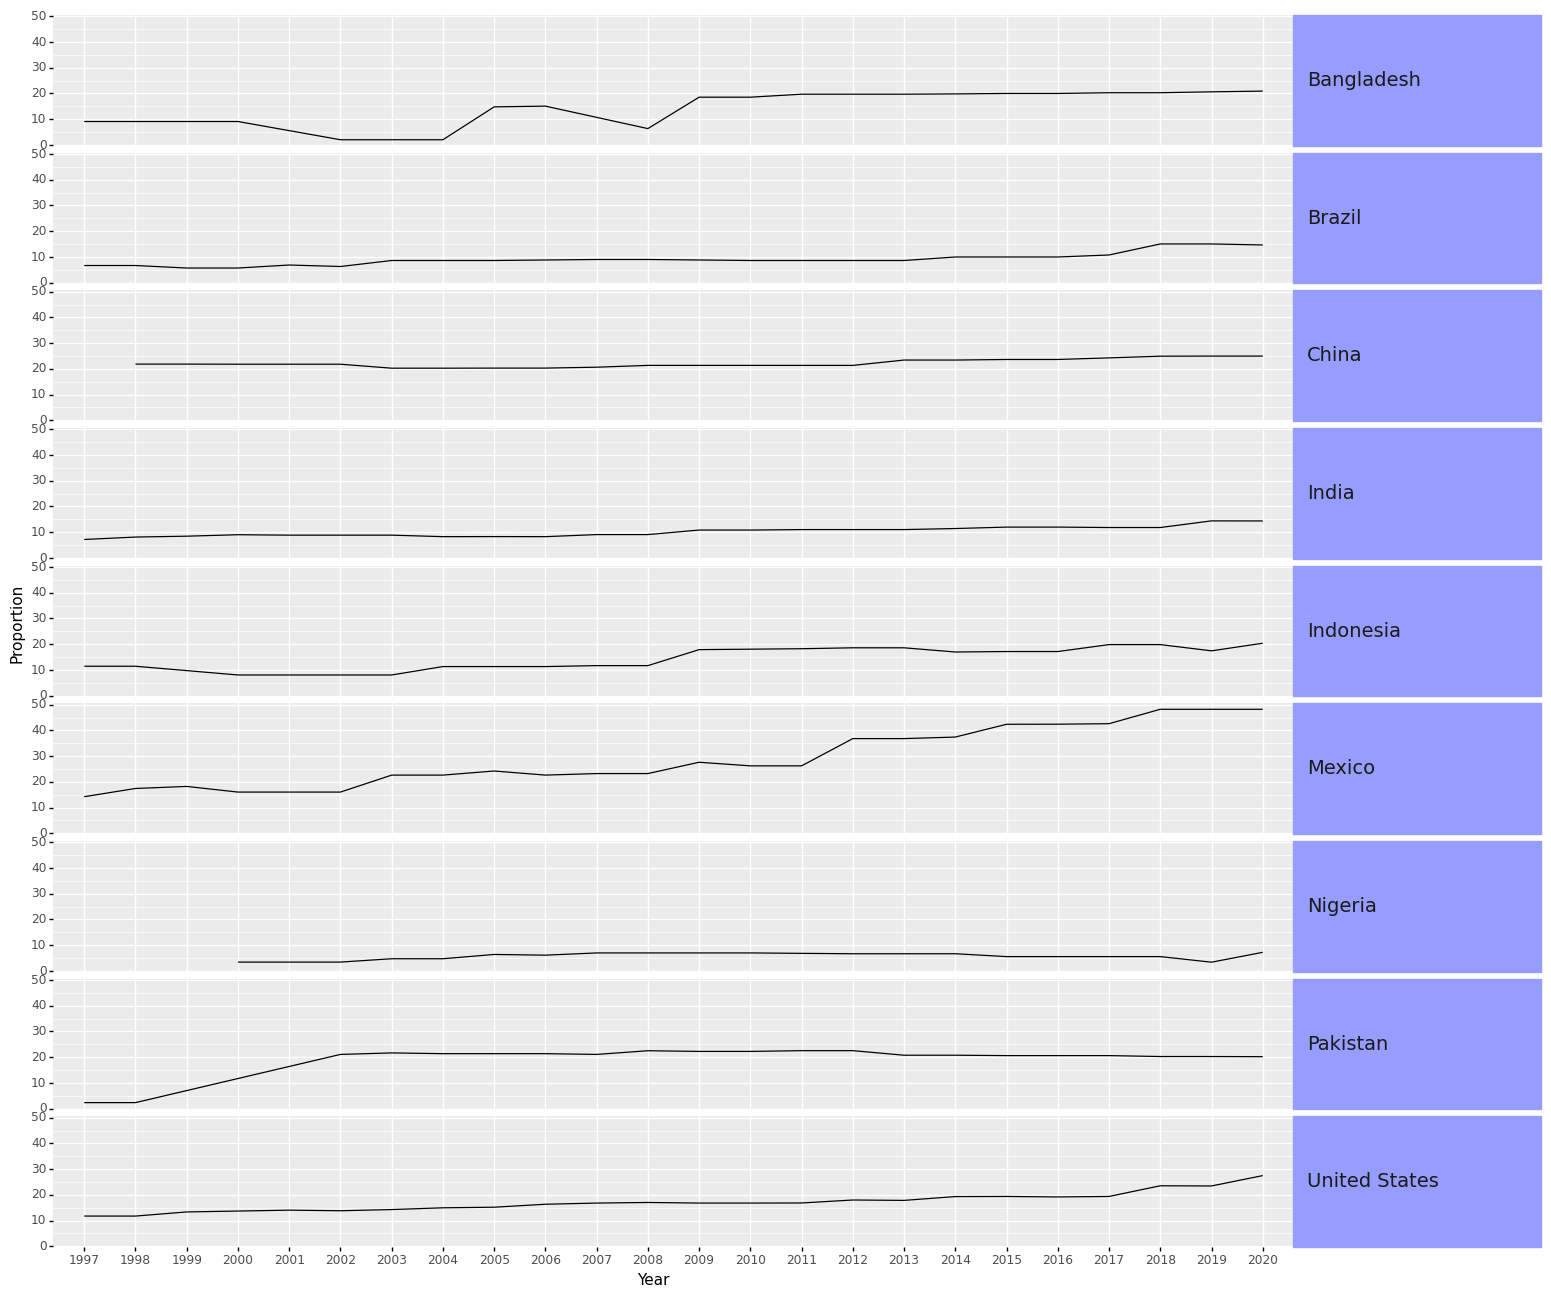

<ggplot: (8772834081347)>

In [65]:
q2_5_df = gender_df[(gender_df["Series Code"]=="SG.GEN.PARL.ZS")].drop(["Unnamed: 0", "Country Code", "Series Name"], axis=1).rename(columns={f"{x} [YR{x}]": x for x in range(1960, 2021)}).T.reset_index(level=0)
q2_5_df = q2_5_df.rename(columns=q2_5_df.iloc[0]).drop([0, 1],axis=0).reset_index(drop=True).rename(columns={"Country Name": "Year"})
q2_5_df
q2_5_casts = []
for col in q2_5_df.columns[1::]:
    if not col in ["China", "India", "United States", "Indonesia", "Pakistan", "Brazil", "Nigeria", "Bangladesh", "Russia", "Mexico"]:
        continue
    cast_temp = q2_5_df[["Year", col]].copy()
    cast_temp["Country"] = col
    cast_temp = cast_temp.rename(columns={col: "Proportion"})
    cast_temp["Proportion"] = cast_temp["Proportion"].astype(float)
    q2_5_casts.append(cast_temp)
q2_5_df = pd.concat(q2_5_casts, axis=0).reset_index(drop=False)
(
    ggplot(q2_5_df.dropna(), aes(x='Year', y='Proportion', group = 1))
    + geom_line()
    + facet_grid('Country ~ .')
    + theme(strip_text_y = element_text(angle = 0, ha = 'left', size=14),
            strip_background_y = element_text(color = '#969dff', width = 0.2),
            figure_size=(16, 16)
           )
    + labs(x='Year', y='Proportion')
)

### Question 6: (10 points) Load the airline passenger dataset. Using plotnine, visualize the monthly time series of the number of domestic passengers with overlayed point and line plots. Format and label the plot to be readable.

Hint: You can use the mizani package to generate the axis breaks and formatted labels

In [77]:
airline_df = pd.read_csv("us_domestic_airline_passengers.csv")
airline_df["Period"] = pd.to_datetime(airline_df["Period"])
airline_df.head()

,Period,Passengers
0,2002-01-01,38499
1,2002-02-01,38561
2,2002-03-01,48397
3,2002-04-01,45358
4,2002-05-01,47050


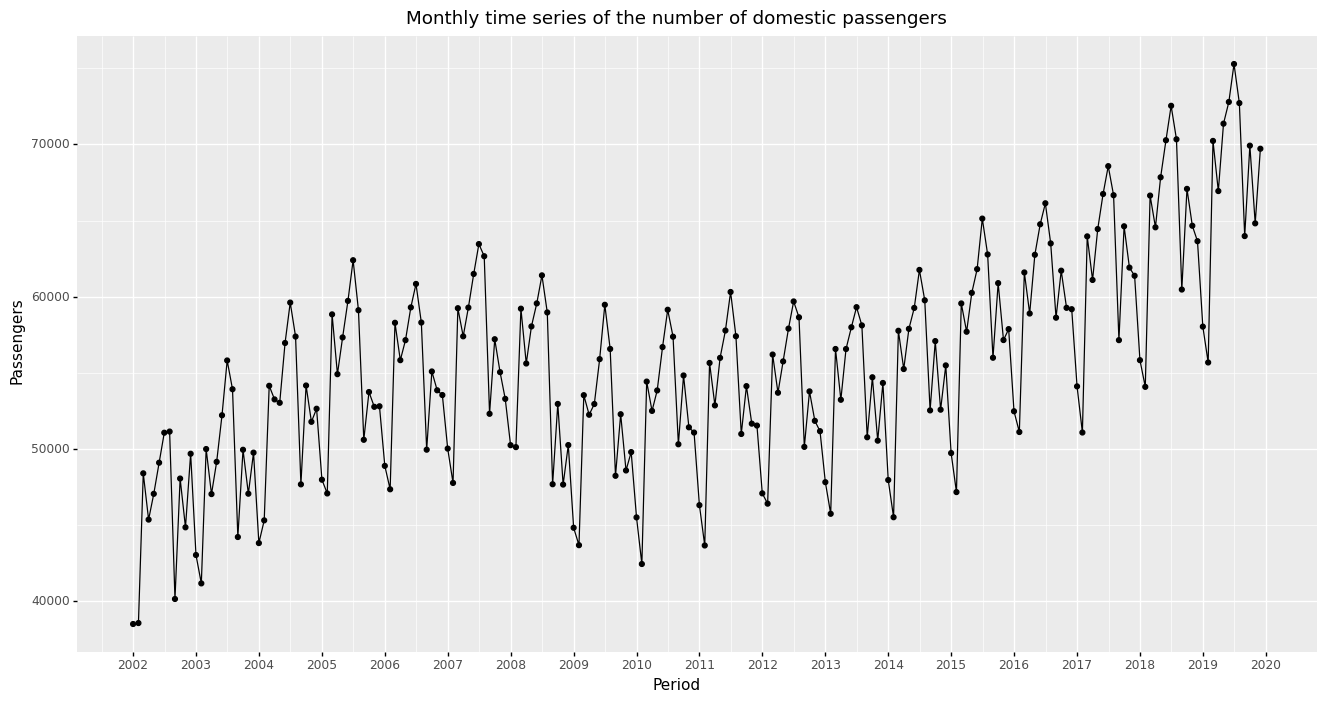

<ggplot: (8772833486385)>

In [86]:
from mizani.breaks import date_breaks
from mizani.formatters import date_format
from plotnine import scales
(
    ggplot(airline_df, aes(x='Period', y='Passengers'))
    + geom_point() + geom_line()
    + scale_x_datetime(breaks=date_breaks('1 year'), labels=date_format('%Y')) 
    + ggtitle("Monthly time series of the number of domestic passengers")
    + theme(figure_size=(16, 8))
)

### Question 7: (15 points) Remove the monthly seasonal effect from the passenger time series and plot the adjusted passenger (mean + residual) time series. What do you observe? 

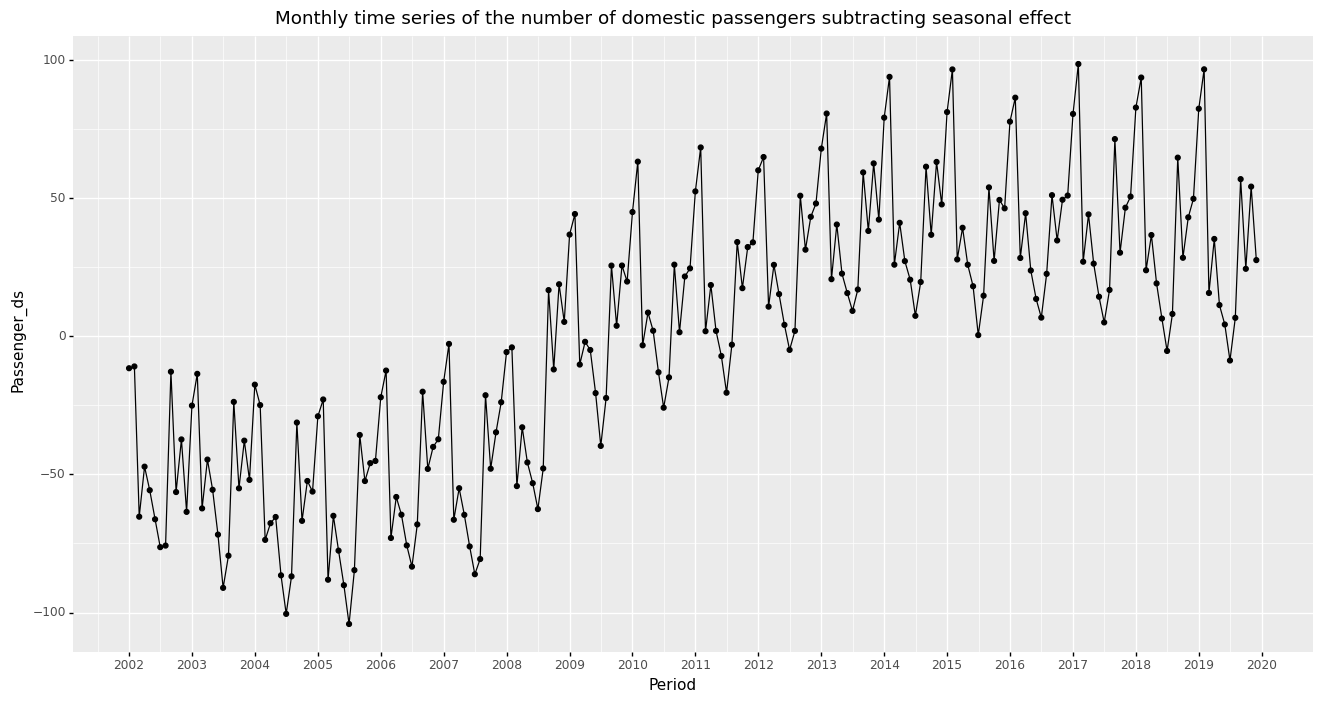

<ggplot: (8772889181444)>

In [98]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
airline_df["Period_numeric"] = list(range(len(airline_df)))
q3_model1 = smf.ols('Period_numeric ~ Passengers', data=airline_df).fit()
airline_df["Passenger_ds"] = q3_model1.resid

(
    ggplot(airline_df, aes(x='Period', y='Passenger_ds'))
    + geom_point() + geom_line()
    + scale_x_datetime(breaks=date_breaks('1 year'), labels=date_format('%Y')) 
    + ggtitle("Monthly time series of the number of domestic passengers subtracting seasonal effect")
    + theme(figure_size=(16, 8))
)

In [99]:
airline_df

,Period,Passengers,Period_numeric,Passenger_residual,Passenger_ds
0,2002-01-01,38499,0,-11.548310,-11.548310
1,2002-02-01,38561,1,-10.897538,-10.897538
2,2002-03-01,48397,2,-65.300866,-65.300866
3,2002-04-01,45358,3,-47.183063,-47.183063
4,2002-05-01,47050,4,-55.713607,-55.713607
...,...,...,...,...,...
211,2019-08-01,72718,211,6.706011,6.706011
212,2019-09-01,63981,212,56.918992,56.918992
213,2019-10-01,69922,213,24.455066,24.455066
214,2019-11-01,64817,214,54.210047,54.210047


## What to submit

* The jupyter notebook file named 'uniquename_si618_lab9_.ipynb'
* The HTML or PDF report generated by your notebook file that should similar to si618_lab9_solution.html